In [1]:
from tensorflow.keras.datasets import mnist       # dataset of handwritten digit images
from tensorflow.keras.models import Sequential    # to create a sequential (layer-by-layer) neural network model
from tensorflow.keras.layers import Dense         # fully connected (dense) layer type for building neural networks
from tensorflow.keras.utils import to_categorical # to convert labels to one-hot encoded format


2025-11-04 06:59:47.629114: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-04 06:59:47.702999: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-04 06:59:49.654135: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# 1. Load Data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

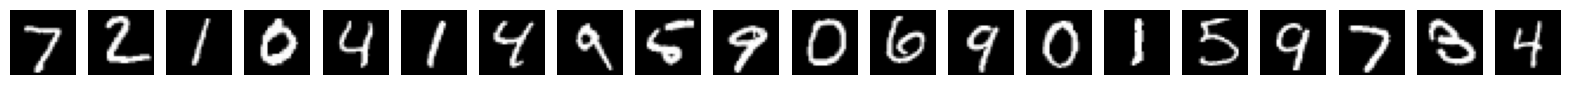

In [3]:
# 2. Let's visualize top 10 images
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 2)) # create a figure to display images

n=20 #number of digits to display
for i in range(n):
    #create subplot in figure
    plt.subplot(1, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis('off')

plt.show()

In [4]:
print("Type of X_train: ", type(X_train))
print("Shape of X_train:", X_train.shape)
print()

print("Type of X_train[0]: ", type(X_train[0]))
print("Shape of X_train[0]:", X_train[0].shape)
print()

print("Number of rows in a image: ", len(X_train[0]))
print("Number of columns in a image: ", len(X_train[0][0]))

print("First row of pixels of first image: ", X_train[0][0])

print("First Image: ", X_train[0])

Type of X_train:  <class 'numpy.ndarray'>
Shape of X_train: (60000, 28, 28)

Type of X_train[0]:  <class 'numpy.ndarray'>
Shape of X_train[0]: (28, 28)

Number of rows in a image:  28
Number of columns in a image:  28
First row of pixels of first image:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First Image:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 

In [5]:
'''
        Image Flatenning
        
    Each image is 28 by 28, so actually it is 3d array..
    1st representing number of images
    2nd number of rows or height of image
    3rd representing width of image.

    We will convert internal rows into one rows.. so rows x columns converted to 
    one row

    e.g:

        a   b   c   d
    a   0   0   1   0
    b   0   1   1   0   =>  0   0   1   0   0   1   1   0   0   0   1   0   0   0   0   1 
    c   0   0   1   0
    d   0   0   0   1
'''

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


In [6]:
print("Type of X_train: ", type(X_train))
print("Shape of X_train:", X_train.shape)
print()

print("Type of X_train[0]: ", type(X_train[0]))
print("Shape of X_train[0]:", X_train[0].shape)
print()

print("Number of rows in a image: ", len(X_train[0]))

print("First image: ", X_train[0])

Type of X_train:  <class 'numpy.ndarray'>
Shape of X_train: (60000, 784)

Type of X_train[0]:  <class 'numpy.ndarray'>
Shape of X_train[0]: (784,)

Number of rows in a image:  784
First image:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   

In [7]:
'''
    Scaling

    instead of 0 to 255,, we will scale them between 0 and 1
'''

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("First image after float: ", X_train[0])

X_train /= 255
X_test /= 255

print("First image after scaling: ", X_train[0])


First image after float:  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

In [ ]:
'''
    Process Target Variable(Y vaiables in dataset)

    we have y variable values between 0 to 9, but model nows 0,1
    so we will convert this variables to vector of 10 dimensions...
    each dimension will represent a digit from classs

    we will use one-hot encoding for this.

    e.g:

                0   1   2   3   4   5   6   7   8   9
    0   =>      1   0   0   0   0   0   0   0   0   0 (so 0 will be represented like this)
    1   =>      0   1   0   0   0   0   0   0   0   0 (so 1 will be represented like this)
    .... and so on
'''

classes = 10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)


In [9]:
'''
    Data is ready now prepare models, first step is 

    Hyper Parameters

    Majorily we decide hyper parameters using experience. dataset doesn't provide
    any hyper parameters.
'''

input_size = 784    # size of each image
batch_size = 200    # how much process in one batch(not pass all 60,000 at once)
hidden1 = 400       # number of neurons in 1st hidden layer
hidden2 = 20        # number of neurons in 2nd hidden layer
classes = 10        # classes/categories in dataset
epochs = 5          # how many time it repeat the full dataset. (one epoch mean read all 60,000 images)

In [ ]:
'''
    Multiple types of neural networks, but we will use basic one known as:
    Standard Neural Network - or -
    Fully Connected Neural Netowrk - or -
    Dense Neural Network

    Dense keywork will actually allow us to create layers of fully connected neural network.
    Sequential is like a box.. in which we will add layers.. and then we compile it with
        tensorflow, it will give us a full model.

    so we can say Sequential is a big box, Dense is a light box inside big box which contain neurons
'''

'\n    Multiple types of neural networks:\n'

In [11]:
# Builing a model

model = Sequential()

#hidden layers
#input_dim, will specify input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation="relu"))
model.add(Dense(hidden2, activation="relu"))

#output layer
model.add(Dense(classes, activation="softmax"))

#now compile
#loss = how neural network will calculate loss (categorical_crossentropy or binary_crossentropy)
#optimizer = how to decrease the loss
#metrics = if need any evaluation
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

model.summary()

/home/maadi/Desktop/my_tasks/python/models_and_datasets/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1762224857.584736    7189 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         8,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
    Parameters Calculation
    output = relu(dot(W, input) + bias)
    
    (400 * 784) + 400 = 314000 = 0.3 million parameters.
    (400 * 784), as fully connected nn, so every input is connected with each neuron of hidden_layer1
    400 bias, with each neurom (1 random value attached with all neurons so all neurons have different values)
'''

In [12]:
# Training the model.
from time import time

current_time = time()
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)
trained_time = time()

print("Model took: ", (trained_time - current_time), "secs")

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5968 - loss: 1.4683
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8360 - loss: 0.6604
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8723 - loss: 0.4833
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8899 - loss: 0.4085
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9010 - loss: 0.3647
Model took:  8.255178213119507 secs


In [14]:
# Testing the model
from sklearn.metrics import  accuracy_score
import numpy as np

y_pred_probs = model.predict(X_test, verbose = 1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

test_accuracy = accuracy_score(y_pred, Y_test)

test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.8771

In [15]:
# test with random images, and there label with visualization

mask = range(20,50)
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

y_pred_probs_valid = model.predict(X_valid)
Y_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


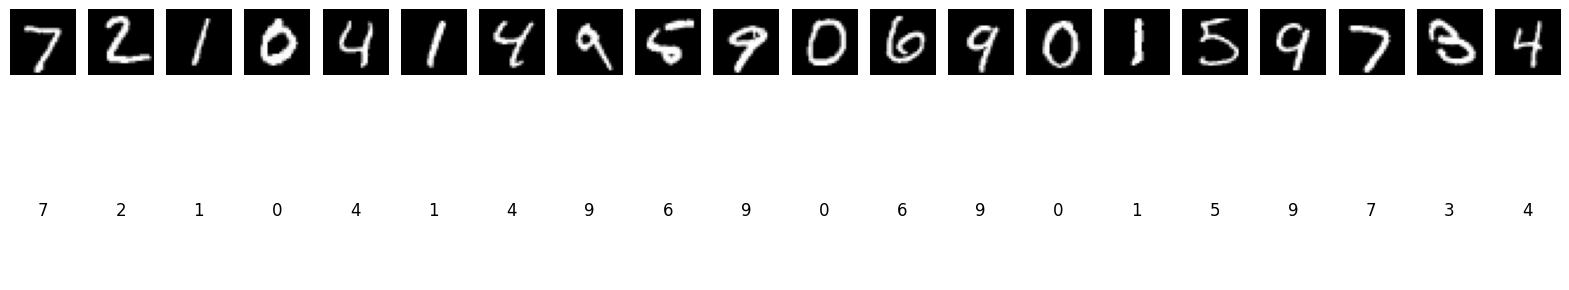

In [17]:
n= len(X_valid)

plt.figure(figsize=(20, 4)) # create a figure to display images

for i in range(n):
    #create subplot in figure
    plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis('off')

    predicted_digit = np.argmax(y_pred_probs_valid[i])
    plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')
plt.show()

plt.close()